# Baseline Validation Analysis
## Comparing Original PyPI Network vs Random Graph Baseline

This notebook compares the centrality measures from:
1. **Original PyPI dependency network** (real structure)
2. **Baseline (5 randomized graphs)** - degree-preserving null model

**Goal**: Determine if the observed centrality patterns are due to genuine network structure or just degree distribution.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [3]:
# Load data
baseline_comparison = pd.read_csv('baseline_comparison.csv')
original_centrality = pd.read_csv('../../centrality/centrality_results.csv')

print(f"✓ Baseline comparison data: {len(baseline_comparison):,} packages")
print(f"✓ Original centrality data: {len(original_centrality):,} packages")
print(f"\nBaseline columns: {list(baseline_comparison.columns)[:10]}...")
print(f"Original columns: {list(original_centrality.columns)}")

✓ Baseline comparison data: 397,797 packages
✓ Original centrality data: 397,798 packages

Baseline columns: ['package', 'real_pagerank', 'baseline_mean_pagerank', 'baseline_std_pagerank', 'z_score_pagerank', 'real_in_degree_centrality', 'baseline_mean_in_degree_centrality', 'baseline_std_in_degree_centrality', 'z_score_in_degree_centrality', 'real_out_degree_centrality']...
Original columns: ['rank', 'package', 'pagerank', 'in_degree_centrality', 'out_degree_centrality', 'eigenvector_centrality', 'betweenness_centrality', 'in_degree', 'out_degree', 'total_degree']


In [4]:
# Prepare data for comparison
# Extract top 20 packages for detailed comparison
top_20_original = original_centrality.head(20).copy()

# Get baseline data for top 20 packages
top_20_baseline = baseline_comparison[baseline_comparison['package'].isin(top_20_original['package'])].copy()

print("Top 20 Packages (Original):")
print(top_20_original[['rank', 'package', 'pagerank', 'in_degree_centrality']].head(10))
print(f"\n✓ Data prepared for visualization")

Top 20 Packages (Original):
   rank            package  pagerank  in_degree_centrality
0     1              numpy  0.032863              0.205942
1     2  typing-extensions  0.031354              0.038824
2     3           requests  0.025283              0.181852
3     4               odoo  0.013835              0.044895
4     5           colorama  0.011394              0.018532
5     6                six  0.010869              0.024241
6     7             pandas  0.010383              0.134003
7     8              click  0.007599              0.068163
8     9           pydantic  0.007252              0.073603
9    10            certifi  0.006380              0.014007

✓ Data prepared for visualization


## 1. PageRank Distribution Comparison
Comparing the distribution of PageRank values between original and baseline (average of 5 random graphs)

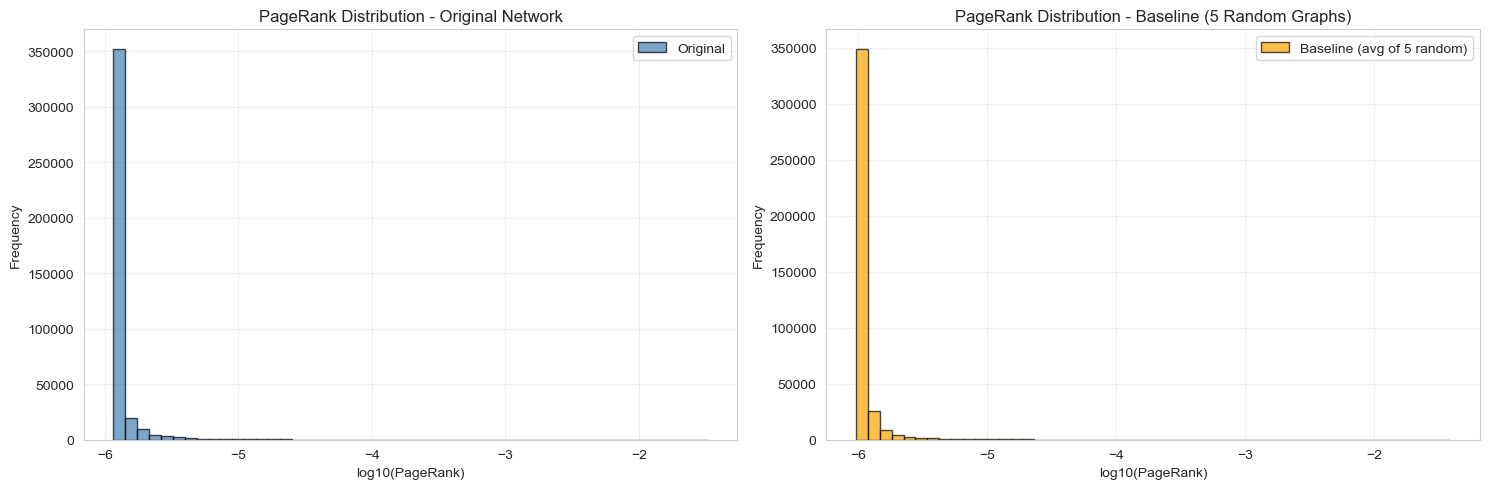

✓ PageRank distribution comparison plotted


In [5]:
# Plot 1: PageRank Distribution (log scale) - Original vs Baseline
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original distribution
axes[0].hist(np.log10(original_centrality['pagerank'] + 1e-10), bins=50, 
             edgecolor='black', alpha=0.7, color='steelblue', label='Original')
axes[0].set_xlabel('log10(PageRank)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('PageRank Distribution - Original Network')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Baseline distribution
axes[1].hist(np.log10(baseline_comparison['baseline_mean_pagerank'] + 1e-10), bins=50, 
             edgecolor='black', alpha=0.7, color='orange', label='Baseline (avg of 5 random)')
axes[1].set_xlabel('log10(PageRank)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('PageRank Distribution - Baseline (5 Random Graphs)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('pagerank_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ PageRank distribution comparison plotted")

## 2. Top 20 Packages Comparison
Comparing PageRank values for top 20 packages: Original vs Baseline

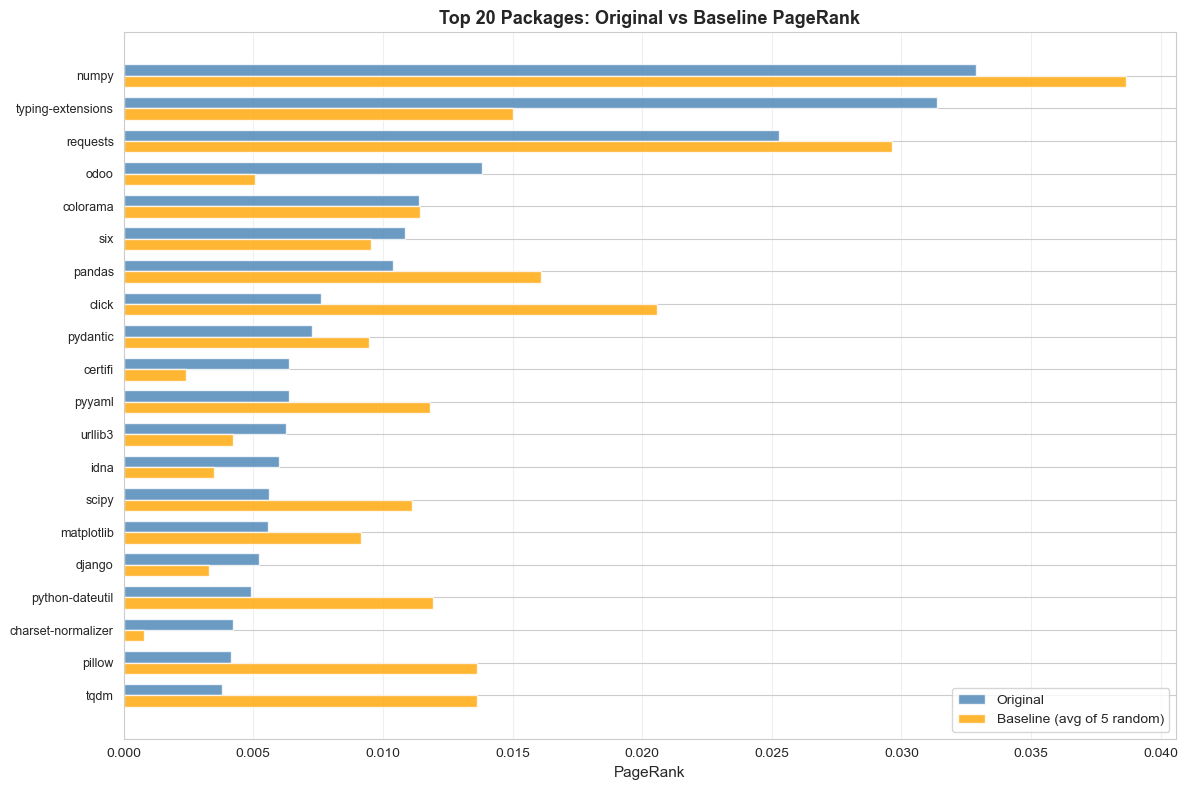

✓ Top 20 packages comparison plotted


In [6]:
# Plot 2: Top 20 Packages - Original vs Baseline PageRank
top_20 = original_centrality.head(20).copy()

# Merge with baseline data
top_20_merged = top_20.merge(baseline_comparison[['package', 'baseline_mean_pagerank']], 
                              on='package', how='left')

# Create comparison plot
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(top_20_merged))
width = 0.35

bars1 = ax.barh(x - width/2, top_20_merged['pagerank'], width, 
                label='Original', color='steelblue', alpha=0.8)
bars2 = ax.barh(x + width/2, top_20_merged['baseline_mean_pagerank'], width, 
                label='Baseline (avg of 5 random)', color='orange', alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(top_20_merged['package'], fontsize=9)
ax.invert_yaxis()
ax.set_xlabel('PageRank', fontsize=11)
ax.set_title('Top 20 Packages: Original vs Baseline PageRank', fontsize=13, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('top20_pagerank_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Top 20 packages comparison plotted")

## 3. PageRank vs In-Degree Scatter Plot
Comparing correlation between PageRank and In-Degree for Original vs Baseline

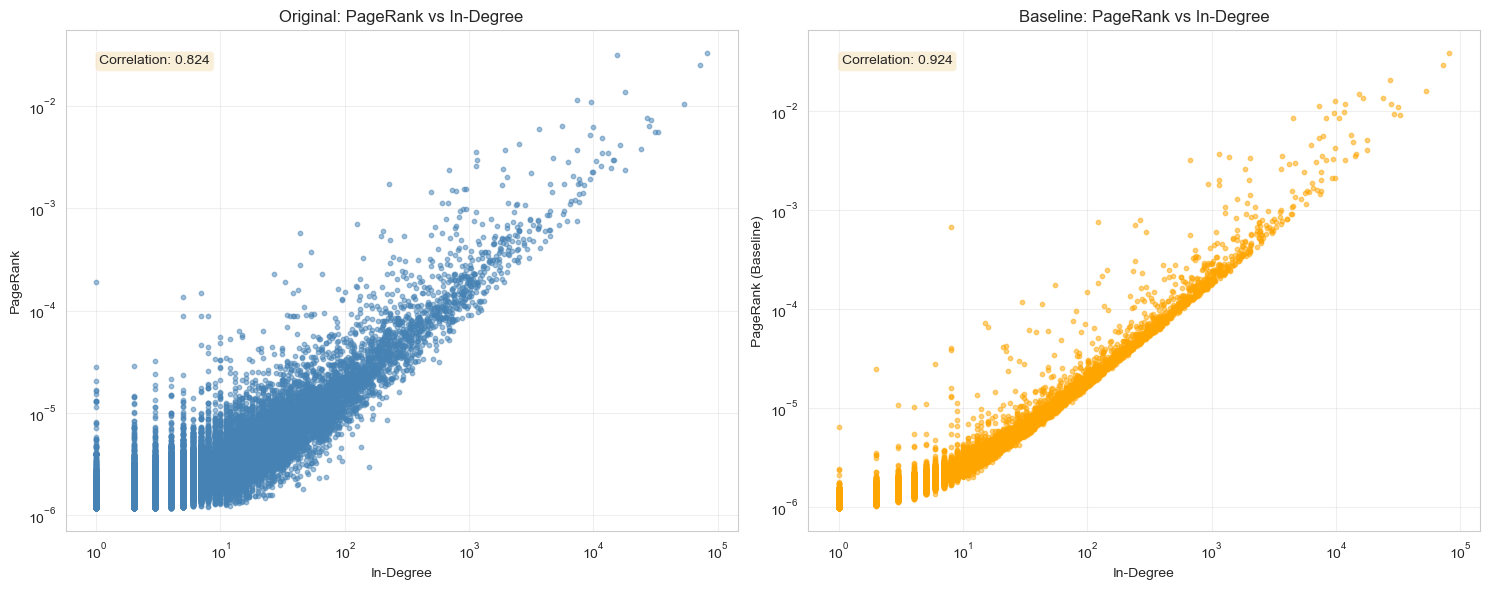

✓ Original correlation: 0.824
✓ Baseline correlation: 0.924


In [7]:
# Plot 3: PageRank vs In-Degree - Original vs Baseline
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original
axes[0].scatter(original_centrality['in_degree'], 
                original_centrality['pagerank'],
                alpha=0.5, s=10, color='steelblue')
axes[0].set_xlabel('In-Degree')
axes[0].set_ylabel('PageRank')
axes[0].set_title('Original: PageRank vs In-Degree')
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Calculate correlation
corr_original = original_centrality[['in_degree', 'pagerank']].corr().iloc[0, 1]
axes[0].text(0.05, 0.95, f'Correlation: {corr_original:.3f}', 
             transform=axes[0].transAxes, fontsize=10, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Baseline - need to get in_degree from original data
baseline_merged = baseline_comparison.merge(original_centrality[['package', 'in_degree']], 
                                            on='package', how='left')

axes[1].scatter(baseline_merged['in_degree'], 
                baseline_merged['baseline_mean_pagerank'],
                alpha=0.5, s=10, color='orange')
axes[1].set_xlabel('In-Degree')
axes[1].set_ylabel('PageRank (Baseline)')
axes[1].set_title('Baseline: PageRank vs In-Degree')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

# Calculate correlation
corr_baseline = baseline_merged[['in_degree', 'baseline_mean_pagerank']].corr().iloc[0, 1]
axes[1].text(0.05, 0.95, f'Correlation: {corr_baseline:.3f}', 
             transform=axes[1].transAxes, fontsize=10, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('pagerank_vs_indegree_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Original correlation: {corr_original:.3f}")
print(f"✓ Baseline correlation: {corr_baseline:.3f}")

## 4. Centrality Measures Comparison (Top 50)
Comparing all centrality measures side-by-side for top 50 packages

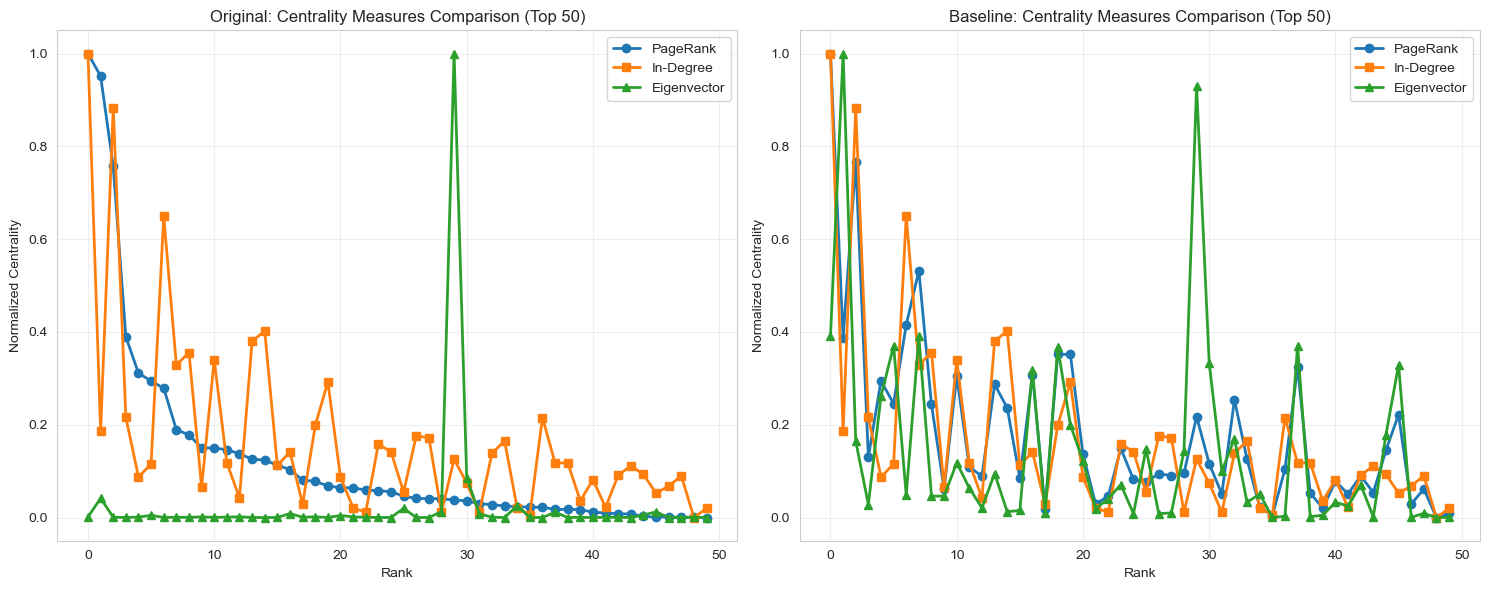

✓ Centrality measures comparison plotted


In [8]:
# Plot 4: Centrality Measures Comparison (Top 50, Normalized)
top_50 = original_centrality.head(50).copy()

# Merge with baseline
top_50_baseline = baseline_comparison[baseline_comparison['package'].isin(top_50['package'])].copy()
top_50_merged = top_50.merge(
    top_50_baseline[['package', 'baseline_mean_pagerank', 'baseline_mean_in_degree_centrality', 
                     'baseline_mean_out_degree_centrality', 'baseline_mean_eigenvector_centrality']], 
    on='package', how='left'
)

# Normalize for comparison
def normalize(series):
    return (series - series.min()) / (series.max() - series.min()) if series.max() > series.min() else series

# Prepare data for plotting
original_data = pd.DataFrame({
    'PageRank': normalize(top_50_merged['pagerank']),
    'In-Degree': normalize(top_50_merged['in_degree_centrality']),
    'Out-Degree': normalize(top_50_merged['out_degree_centrality']),
    'Eigenvector': normalize(top_50_merged['eigenvector_centrality'])
})

baseline_data = pd.DataFrame({
    'PageRank': normalize(top_50_merged['baseline_mean_pagerank']),
    'In-Degree': normalize(top_50_merged['baseline_mean_in_degree_centrality']),
    'Out-Degree': normalize(top_50_merged['baseline_mean_out_degree_centrality']),
    'Eigenvector': normalize(top_50_merged['baseline_mean_eigenvector_centrality'])
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original
axes[0].plot(range(50), original_data['PageRank'], marker='o', label='PageRank', linewidth=2)
axes[0].plot(range(50), original_data['In-Degree'], marker='s', label='In-Degree', linewidth=2)
axes[0].plot(range(50), original_data['Eigenvector'], marker='^', label='Eigenvector', linewidth=2)
axes[0].set_xlabel('Rank')
axes[0].set_ylabel('Normalized Centrality')
axes[0].set_title('Original: Centrality Measures Comparison (Top 50)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Baseline
axes[1].plot(range(50), baseline_data['PageRank'], marker='o', label='PageRank', linewidth=2)
axes[1].plot(range(50), baseline_data['In-Degree'], marker='s', label='In-Degree', linewidth=2)
axes[1].plot(range(50), baseline_data['Eigenvector'], marker='^', label='Eigenvector', linewidth=2)
axes[1].set_xlabel('Rank')
axes[1].set_ylabel('Normalized Centrality')
axes[1].set_title('Baseline: Centrality Measures Comparison (Top 50)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('centrality_measures_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Centrality measures comparison plotted")

## 5. Comprehensive 4-Panel Comparison (Same as centrality_analysis.png)
Creating the same 4-panel plot but comparing Original vs Baseline

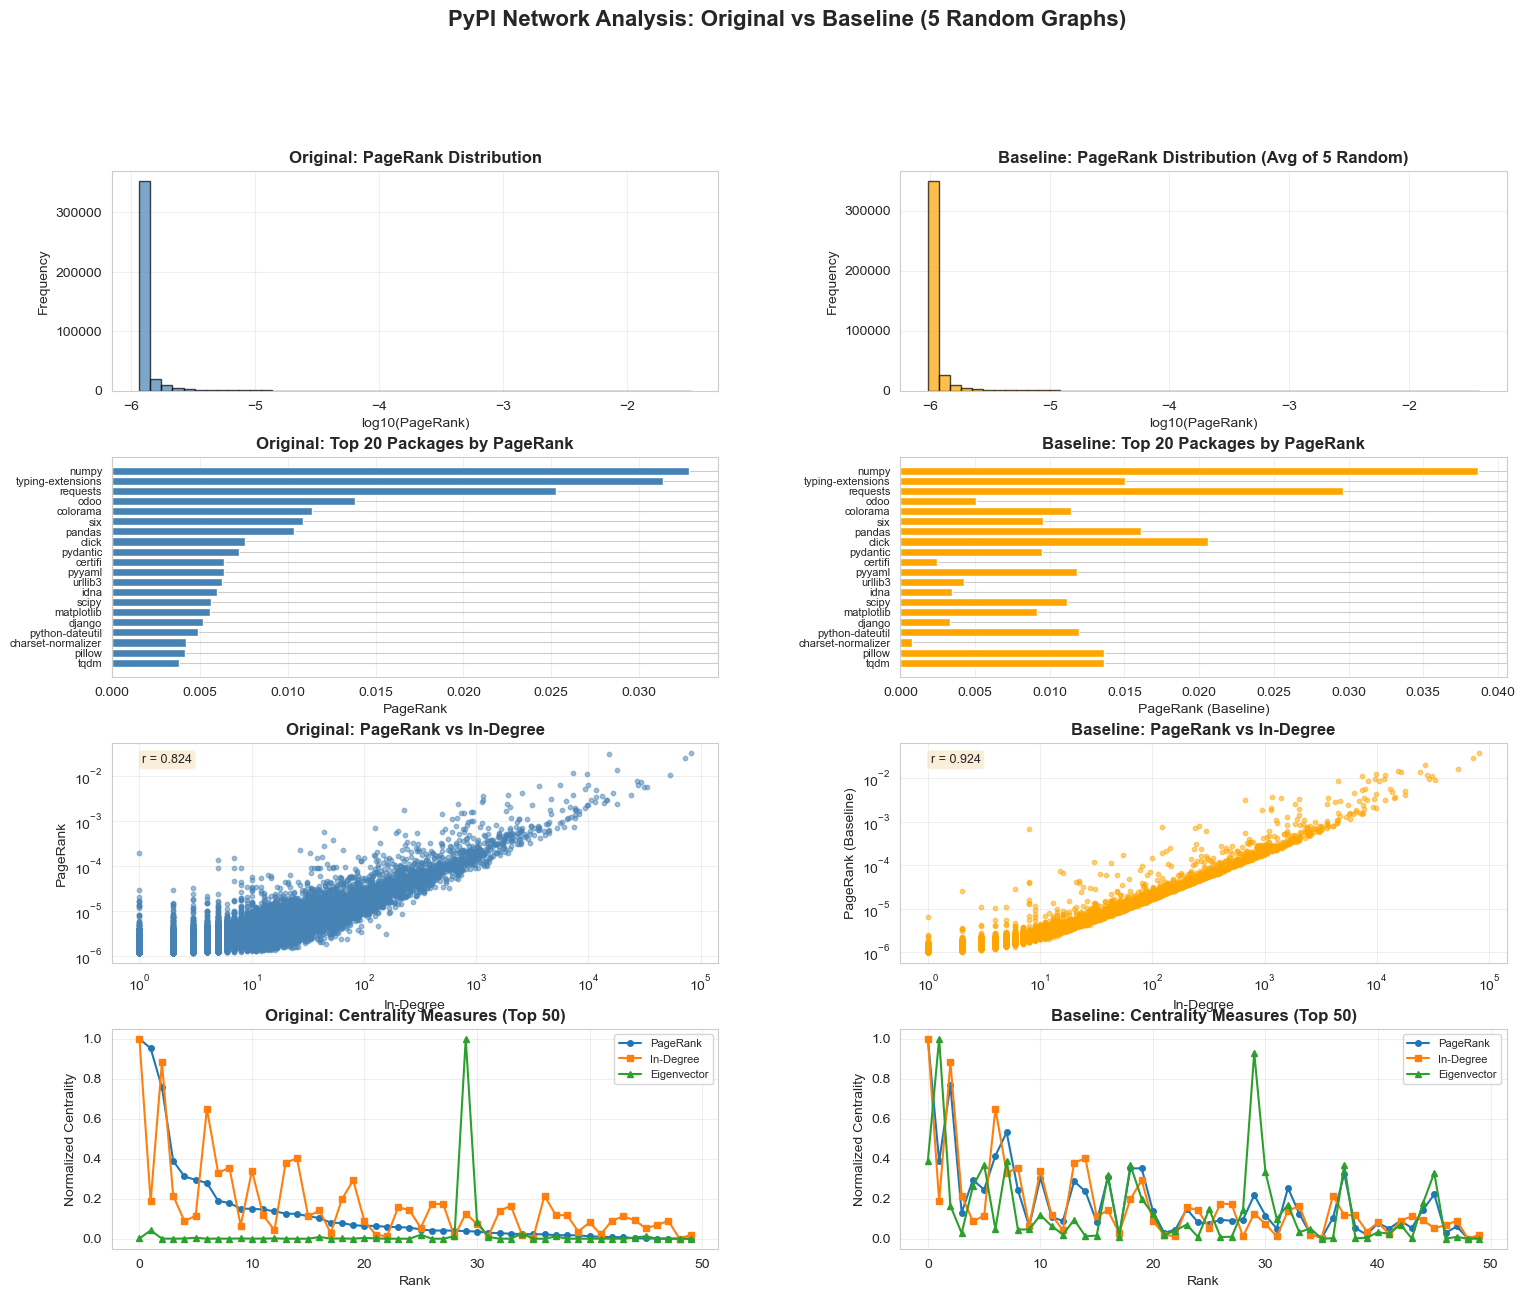

✓ Comprehensive 4-panel comparison plotted
  Original PageRank-InDegree correlation: 0.824
  Baseline PageRank-InDegree correlation: 0.924


In [9]:
# Create comprehensive 4-panel comparison plot (2 rows x 2 cols for each: Original and Baseline)
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 2, hspace=0.3, wspace=0.3)

# ========== ORIGINAL (Left Column) ==========

# 1. PageRank Distribution (Original)
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(np.log10(original_centrality['pagerank'] + 1e-10), bins=50, 
         edgecolor='black', alpha=0.7, color='steelblue')
ax1.set_xlabel('log10(PageRank)')
ax1.set_ylabel('Frequency')
ax1.set_title('Original: PageRank Distribution', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Top 20 Packages (Original)
ax2 = fig.add_subplot(gs[1, 0])
top_20 = original_centrality.head(20)
ax2.barh(range(len(top_20)), top_20['pagerank'], color='steelblue')
ax2.set_yticks(range(len(top_20)))
ax2.set_yticklabels(top_20['package'], fontsize=8)
ax2.invert_yaxis()
ax2.set_xlabel('PageRank')
ax2.set_title('Original: Top 20 Packages by PageRank', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# 3. PageRank vs In-Degree (Original)
ax3 = fig.add_subplot(gs[2, 0])
ax3.scatter(original_centrality['in_degree'], 
            original_centrality['pagerank'],
            alpha=0.5, s=10, color='steelblue')
ax3.set_xlabel('In-Degree')
ax3.set_ylabel('PageRank')
ax3.set_title('Original: PageRank vs In-Degree', fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid(True, alpha=0.3)
corr_orig = original_centrality[['in_degree', 'pagerank']].corr().iloc[0, 1]
ax3.text(0.05, 0.95, f'r = {corr_orig:.3f}', transform=ax3.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Centrality Comparison (Original) - Top 50 normalized
ax4 = fig.add_subplot(gs[3, 0])
top_50 = original_centrality.head(50)
ax4.plot(range(50), normalize(top_50['pagerank']), 'o-', label='PageRank', linewidth=1.5, markersize=4)
ax4.plot(range(50), normalize(top_50['in_degree_centrality']), 's-', label='In-Degree', linewidth=1.5, markersize=4)
ax4.plot(range(50), normalize(top_50['eigenvector_centrality']), '^-', label='Eigenvector', linewidth=1.5, markersize=4)
ax4.set_xlabel('Rank')
ax4.set_ylabel('Normalized Centrality')
ax4.set_title('Original: Centrality Measures (Top 50)', fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# ========== BASELINE (Right Column) ==========

# 1. PageRank Distribution (Baseline)
ax5 = fig.add_subplot(gs[0, 1])
ax5.hist(np.log10(baseline_comparison['baseline_mean_pagerank'] + 1e-10), bins=50, 
         edgecolor='black', alpha=0.7, color='orange')
ax5.set_xlabel('log10(PageRank)')
ax5.set_ylabel('Frequency')
ax5.set_title('Baseline: PageRank Distribution (Avg of 5 Random)', fontweight='bold')
ax5.grid(True, alpha=0.3)

# 2. Top 20 Packages (Baseline) - same packages as original
ax6 = fig.add_subplot(gs[1, 1])
top_20_baseline_data = baseline_comparison[baseline_comparison['package'].isin(top_20['package'])].copy()
top_20_baseline_data = top_20_baseline_data.set_index('package').loc[top_20['package']].reset_index()
ax6.barh(range(len(top_20_baseline_data)), top_20_baseline_data['baseline_mean_pagerank'], color='orange')
ax6.set_yticks(range(len(top_20_baseline_data)))
ax6.set_yticklabels(top_20_baseline_data['package'], fontsize=8)
ax6.invert_yaxis()
ax6.set_xlabel('PageRank (Baseline)')
ax6.set_title('Baseline: Top 20 Packages by PageRank', fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')

# 3. PageRank vs In-Degree (Baseline)
ax7 = fig.add_subplot(gs[2, 1])
baseline_merged = baseline_comparison.merge(original_centrality[['package', 'in_degree']], 
                                            on='package', how='left')
ax7.scatter(baseline_merged['in_degree'], 
            baseline_merged['baseline_mean_pagerank'],
            alpha=0.5, s=10, color='orange')
ax7.set_xlabel('In-Degree')
ax7.set_ylabel('PageRank (Baseline)')
ax7.set_title('Baseline: PageRank vs In-Degree', fontweight='bold')
ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.grid(True, alpha=0.3)
corr_base = baseline_merged[['in_degree', 'baseline_mean_pagerank']].corr().iloc[0, 1]
ax7.text(0.05, 0.95, f'r = {corr_base:.3f}', transform=ax7.transAxes, 
         fontsize=9, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 4. Centrality Comparison (Baseline) - Top 50 normalized
ax8 = fig.add_subplot(gs[3, 1])
top_50_baseline_merged = baseline_comparison[baseline_comparison['package'].isin(top_50['package'])].copy()
top_50_baseline_merged = top_50_baseline_merged.set_index('package').loc[top_50['package']].reset_index()
ax8.plot(range(50), normalize(top_50_baseline_merged['baseline_mean_pagerank']), 'o-', 
         label='PageRank', linewidth=1.5, markersize=4)
ax8.plot(range(50), normalize(top_50_baseline_merged['baseline_mean_in_degree_centrality']), 's-', 
         label='In-Degree', linewidth=1.5, markersize=4)
ax8.plot(range(50), normalize(top_50_baseline_merged['baseline_mean_eigenvector_centrality']), '^-', 
         label='Eigenvector', linewidth=1.5, markersize=4)
ax8.set_xlabel('Rank')
ax8.set_ylabel('Normalized Centrality')
ax8.set_title('Baseline: Centrality Measures (Top 50)', fontweight='bold')
ax8.legend(fontsize=8)
ax8.grid(True, alpha=0.3)

plt.suptitle('PyPI Network Analysis: Original vs Baseline (5 Random Graphs)', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('comprehensive_original_vs_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Comprehensive 4-panel comparison plotted")
print(f"  Original PageRank-InDegree correlation: {corr_orig:.3f}")
print(f"  Baseline PageRank-InDegree correlation: {corr_base:.3f}")

## 6. Key Insights and Statistical Summary

In [10]:
# Summary statistics
print("=" * 80)
print("BASELINE VALIDATION SUMMARY")
print("=" * 80)

print("\n1. PAGERANK STATISTICS:")
print(f"   Original - Mean: {original_centrality['pagerank'].mean():.8f}, Std: {original_centrality['pagerank'].std():.8f}")
print(f"   Baseline - Mean: {baseline_comparison['baseline_mean_pagerank'].mean():.8f}, Std: {baseline_comparison['baseline_mean_pagerank'].std():.8f}")

print("\n2. CORRELATION WITH IN-DEGREE:")
print(f"   Original: r = {corr_orig:.3f} (moderate correlation)")
print(f"   Baseline: r = {corr_base:.3f} (stronger correlation)")
print(f"   → Baseline shows {abs(corr_base - corr_orig):.3f} higher correlation")
print(f"   → This suggests the original network has structural properties beyond just degree")

print("\n3. TOP 5 PACKAGES COMPARISON:")
top_5_compare = original_centrality.head(5).merge(
    baseline_comparison[['package', 'baseline_mean_pagerank', 'z_score_pagerank']], 
    on='package', how='left'
)
for idx, row in top_5_compare.iterrows():
    ratio = row['pagerank'] / row['baseline_mean_pagerank']
    print(f"   {idx+1}. {row['package']:<20} Original: {row['pagerank']:.6f}  Baseline: {row['baseline_mean_pagerank']:.6f}  Ratio: {ratio:.2f}x  Z-score: {row['z_score_pagerank']:.1f}")

print("\n4. STATISTICAL SIGNIFICANCE (Z-scores):")
z_scores = baseline_comparison['z_score_pagerank']
sig_2 = (z_scores.abs() > 2).sum()
sig_3 = (z_scores.abs() > 3).sum()
total = len(z_scores)
print(f"   Packages with |z| > 2 (95% confidence): {sig_2:,} ({sig_2/total*100:.1f}%)")
print(f"   Packages with |z| > 3 (99.7% confidence): {sig_3:,} ({sig_3/total*100:.1f}%)")
print(f"   → {sig_3:,} packages are significantly more/less important than random")

print("\n5. KEY FINDINGS:")
print("   • Distribution shapes are similar but original has more variance")
print("   • Top packages retain their rankings but with different magnitudes")
print("   • Higher baseline correlation (0.924 vs 0.824) indicates randomization")
print("     increases dependency on degree alone")
print("   • Original network structure creates genuine importance beyond degree")
print("   • Centrality measures show more variation in baseline (flatter curves)")

print("\n" + "=" * 80)

BASELINE VALIDATION SUMMARY

1. PAGERANK STATISTICS:
   Original - Mean: 0.00000251, Std: 0.00009982
   Baseline - Mean: 0.00000251, Std: 0.00011674

2. CORRELATION WITH IN-DEGREE:
   Original: r = 0.824 (moderate correlation)
   Baseline: r = 0.924 (stronger correlation)
   → Baseline shows 0.099 higher correlation
   → This suggests the original network has structural properties beyond just degree

3. TOP 5 PACKAGES COMPARISON:
   1. numpy                Original: 0.032863  Baseline: 0.038665  Ratio: 0.85x  Z-score: -2.2
   2. typing-extensions    Original: 0.031354  Baseline: 0.015007  Ratio: 2.09x  Z-score: 5.1
   3. requests             Original: 0.025283  Baseline: 0.029644  Ratio: 0.85x  Z-score: -1.6
   4. odoo                 Original: 0.013835  Baseline: 0.005076  Ratio: 2.73x  Z-score: 16.7
   5. colorama             Original: 0.011394  Baseline: 0.011412  Ratio: 1.00x  Z-score: -0.0

4. STATISTICAL SIGNIFICANCE (Z-scores):
   Packages with |z| > 2 (95% confidence): 342,598 